# MetaData

jumlah_kartu	   = jumlah kartu aktif yang dimiliki pelanggan

outstanding	   = total saldo pemakaian kartu kredit

limit_kredit	   = Jumlah maksimum limit kartu kredit yang dapat digunakan

tagihan	   = Jumlah tagihan pada bulan terakhir

total_pemakaian	Total    = pemakaian kartu kredit (tunai dan retail) pada bulan terakhir

total_pemakaian_tunai	   = Total pemakaian transaksi tunai pada bulan terakhir (cash advance)

total_pemakaian_retail	   = Total pemakaian transaksi retail pada bulan terakhir

sisa_tagihan_tidak_terbayar	   = Jumlah tagihan yang tidak terbayar pada bulan terakhir

kode_cabang	 

rasio_pembayaran	   = Rasio perbandingan jumlah yang dibayar dengan tagihan pada bulan terakhir

persentasi_overlimit	   = Persentasi overlimit

nomor_pelanggan	   = ID pelanggan

utilisasi_3bulan	   = Utilisasi kartu kredit selama 3 bulan terakhir

pemakaian_3bln_per_limit	   = Rata-rata pemakaian selama 3 bulan terakhir dibagi total limit

rasio_pembayaran_3bulan	   = Rata-rata rasio pembayaran 3 bulan terakhir

utilisasi_6bulan	   = Utilisasi kartu kredit selama 3 bulan sebelum 3 bulan terakhir

pemakaian_6bln_per_limit	   = Rata-rata pemakaian selama 3 bulan sebelum 3 bulan terakhir dibagi total limit

rasio_pembayaran_6bulan	   = Rata-rata rasio pembayaran 3 bulan sebelum 3 bulan terakhir

skor_pembayaran	   = Nilai yang dihitung berdasarkan jumlah minimum pembayaran yang dilakukan pelanggan dalam 6 bulan terakhir

sisa_tagihan_per_jumlah_kartu	   = Jumlah tagihan yang tidak terbayar pada bulan terakhir dibagi jumlah kartu aktif

sisa_tagihan_per_limit	   = Jumlah tagihan yang tidak terbayar pada bulan terakhir dibagi total limit

total_pemakaian_per_limit	   = Total pemakaian kartu kredit (tunai dan retail) pada bulan terakhir dibagi total limit

jumlah_tahun_sejak_pembukaan_kredit	   = Jumlah tahun sejak pembukaan kartu kredit pertama kali

flag_kredit_macet	   = Flag yang menandakan apakah kredit macet atau tidak

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8)

In [99]:
df_train = pd.read_csv('npl_train.csv')
df_test = pd.read_csv('npl_test.csv')

In [100]:
df_train.columns

Index(['X', 'jumlah_kartu', 'outstanding', 'limit_kredit', 'tagihan',
       'total_pemakaian_tunai', 'total_pemakaian_retail',
       'sisa_tagihan_tidak_terbayar', 'kode_cabang', 'rasio_pembayaran',
       'persentasi_overlimit', 'rasio_pembayaran_3bulan',
       'rasio_pembayaran_6bulan', 'skor_delikuensi', 'flag_kredit_macet',
       'jumlah_tahun_sejak_pembukaan_kredit', 'total_pemakaian',
       'sisa_tagihan_per_jumlah_kartu', 'sisa_tagihan_per_limit',
       'total_pemakaian_per_limit', 'pemakaian_3bln_per_limit',
       'pemakaian_6bln_per_limit', 'utilisasi_3bulan', 'utilisasi_6bulan'],
      dtype='object')

In [101]:
df_train.shape

(15493, 24)

In [102]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15493 entries, 0 to 15492
Data columns (total 24 columns):
X                                      15493 non-null int64
jumlah_kartu                           15493 non-null int64
outstanding                            15493 non-null int64
limit_kredit                           15493 non-null float64
tagihan                                15493 non-null float64
total_pemakaian_tunai                  15493 non-null float64
total_pemakaian_retail                 15493 non-null float64
sisa_tagihan_tidak_terbayar            15493 non-null float64
kode_cabang                            15393 non-null object
rasio_pembayaran                       15493 non-null float64
persentasi_overlimit                   15493 non-null float64
rasio_pembayaran_3bulan                15493 non-null float64
rasio_pembayaran_6bulan                15493 non-null float64
skor_delikuensi                        15493 non-null int64
flag_kredit_macet               

In [103]:
df_train.apply(lambda x : x.nunique())

X                                      15493
jumlah_kartu                              15
outstanding                            10359
limit_kredit                             150
tagihan                                10018
total_pemakaian_tunai                     94
total_pemakaian_retail                  5714
sisa_tagihan_tidak_terbayar             6947
kode_cabang                               11
rasio_pembayaran                        1665
persentasi_overlimit                    1222
rasio_pembayaran_3bulan                 2574
rasio_pembayaran_6bulan                 2416
skor_delikuensi                            6
flag_kredit_macet                          2
jumlah_tahun_sejak_pembukaan_kredit      448
total_pemakaian                         5990
sisa_tagihan_per_jumlah_kartu           8524
sisa_tagihan_per_limit                  3235
total_pemakaian_per_limit               3634
pemakaian_3bln_per_limit                4015
pemakaian_6bln_per_limit                4049
utilisasi_

In [104]:
df_test.shape

(2214, 23)

In [105]:
df_train.iloc[:5, :10].round(3)

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,kode_cabang,rasio_pembayaran
0,1,2,36158,7000000.0,23437.0,0.0,94.0,26323.0,I,102.19
1,2,2,268691,10000000.0,254564.0,0.0,1012.0,0.0,A,0.00
2,3,3,6769149,28000000.0,4159779.0,0.0,0.0,0.0,A,100.00
3,4,4,3496732,21000000.0,111231.0,0.0,2536660.0,581334.0,G,100.00
4,5,2,9402085,10000000.0,6099283.0,0.0,2666558.0,5951865.0,A,95.99


In [106]:
df_train.iloc[:, :10].describe().round(3)

,X,jumlah_kartu,outstanding,limit_kredit,tagihan,total_pemakaian_tunai,total_pemakaian_retail,sisa_tagihan_tidak_terbayar,rasio_pembayaran
count,15493.000,15493.000,1.549300e+04,1.549300e+04,1.549300e+04,1.549300e+04,1.549300e+04,1.549300e+04,15493.000
mean,7747.000,2.507,1.159833e+07,2.079833e+07,8.078663e+06,7.453291e+04,2.025857e+06,8.140875e+06,64.647
std,4472.588,1.013,2.408569e+07,2.955334e+07,1.761286e+07,6.184139e+05,7.927677e+06,1.922430e+07,794.169
min,1.000,1.000,0.000000e+00,3.000000e+06,2.004300e+04,0.000000e+00,-1.566720e+07,0.000000e+00,-18138.000
25%,3874.000,2.000,2.000551e+06,5.000000e+06,8.182500e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000
50%,7747.000,2.000,4.726943e+06,9.000000e+06,3.145857e+06,0.000000e+00,2.010420e+05,2.750923e+06,27.000
75%,11620.000,3.000,1.064848e+07,2.200000e+07,7.404991e+06,0.000000e+00,1.398000e+06,7.143198e+06,100.000
max,15493.000,16.000,7.980586e+08,1.000000e+09,6.280000e+08,2.884057e+07,2.850000e+08,4.440000e+08,68983.000


In [107]:
df_train.iloc[:, 10:].head()

,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
0,0.0,74.78,100.00,0,0,15.416667,94.0,13161.5,0.003760,0.000013,0.011719,0.017810,0.013228,0.021949
1,0.0,0.00,0.00,0,0,0.750000,1012.0,0.0,0.000000,0.000101,0.000000,0.000000,0.004232,0.000300
2,0.0,100.00,100.91,0,0,10.750000,0.0,0.0,0.000000,0.000000,0.040518,0.047703,0.249389,0.267853
3,0.0,25.01,22.64,0,0,19.750000,2536660.0,145333.5,0.027683,0.120793,0.055971,0.016851,0.101912,0.346635
4,0.0,97.49,99.84,0,0,1.666667,2666558.0,2975932.5,0.595186,0.266656,0.323027,0.131162,0.707865,0.336571


In [108]:
df_train.iloc[:, 10:].describe()

,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,flag_kredit_macet,jumlah_tahun_sejak_pembukaan_kredit,total_pemakaian,sisa_tagihan_per_jumlah_kartu,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_3bulan,utilisasi_6bulan
count,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,1.549300e+04,1.549300e+04,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000
mean,3.343533,50.530351,81.666238,0.004776,0.087717,6.634093,2.100421e+06,2.968060e+06,0.468246,0.109362,0.167446,0.202609,0.571102,0.533719
std,9.241921,1327.275247,1467.822452,0.114088,0.282892,4.675454,8.092612e+06,6.262192e+06,0.473056,0.200159,0.192327,0.274293,0.411928,0.432350
min,0.000000,-57792.340000,-77056.000000,0.000000,0.000000,0.750000,-1.566720e+07,0.000000e+00,0.000000,-0.632000,-0.126000,-0.569000,0.000288,0.000000
25%,0.000000,20.200000,21.600000,0.000000,0.000000,2.920000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.035200,0.032900,0.189000,0.155000
50%,0.000000,50.000000,65.600000,0.000000,0.000000,5.666667,2.480000e+05,1.209318e+06,0.335000,0.022100,0.108000,0.117000,0.575000,0.496000
75%,1.060000,91.370000,100.000000,0.000000,0.000000,9.330000,1.512235e+06,3.088477e+06,0.930000,0.128000,0.239000,0.285000,0.917000,0.863000
max,190.000000,75575.000000,54899.000000,5.000000,1.000000,34.416667,3.140000e+08,1.480000e+08,7.240000,4.600000,3.490000,8.110000,8.125671,9.730000


In [109]:
df_train.flag_kredit_macet.value_counts()/len(df_train)

0    0.912283
1    0.087717
Name: flag_kredit_macet, dtype: float64

In [110]:
drops = ['X', 'kode_cabang']

df_train.drop(drops, axis=1, inplace=True)
df_test.drop(drops, axis=1, inplace=True)

In [111]:
df_train = df_train.abs()
df_test = df_test.abs()

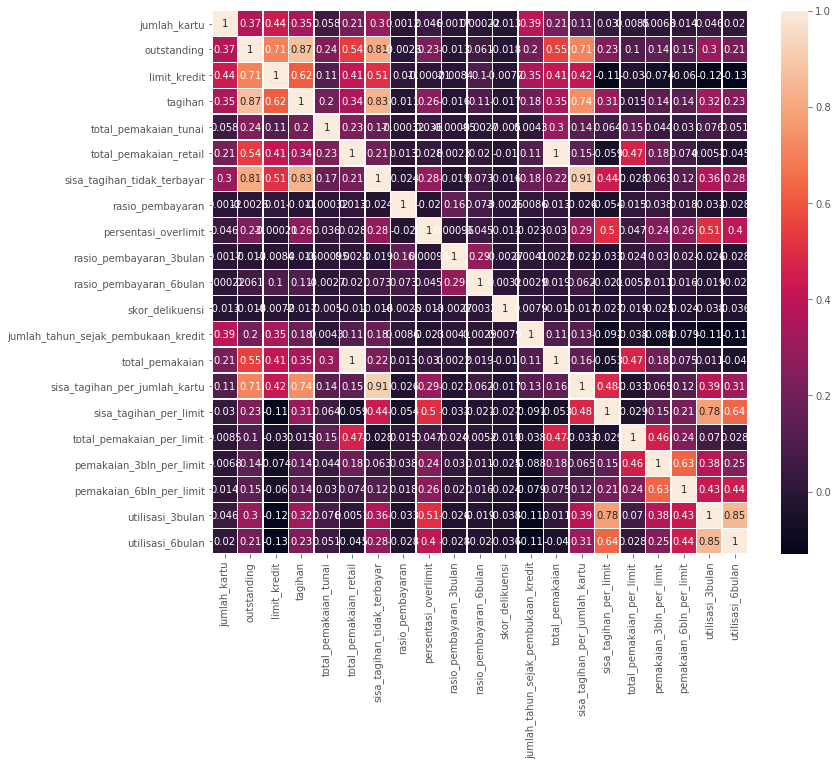

In [112]:
feature = df_train[df_test.columns]

plt.figure(figsize=(12, 10))
sns.heatmap(feature.corr(), annot=True, linewidth=0.4)
plt.show()

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


X = add_constant(feature)

df_vif = pd.Series([variance_inflation_factor(X.values, i) 
               for i in np.arange(X.shape[1])], 
              index=X.columns)

In [114]:
no_multicolinear = df_vif[df_vif<=5]
multicolinear = df_vif[df_vif>5]

In [115]:
no_multicolinear

jumlah_kartu                           1.713594
limit_kredit                           3.144149
rasio_pembayaran                       1.031890
persentasi_overlimit                   1.453691
rasio_pembayaran_3bulan                1.122237
rasio_pembayaran_6bulan                1.133803
skor_delikuensi                        1.002313
jumlah_tahun_sejak_pembukaan_kredit    1.284601
sisa_tagihan_per_limit                 3.720570
total_pemakaian_per_limit              1.739338
pemakaian_3bln_per_limit               2.390706
pemakaian_6bln_per_limit               2.000273
utilisasi_6bulan                       4.244630
dtype: float64

In [116]:
multicolinear

const                            1.244813e+01
outstanding                      1.021864e+01
tagihan                          5.492029e+00
total_pemakaian_tunai            8.772222e+03
total_pemakaian_retail           1.436694e+06
sisa_tagihan_tidak_terbayar      1.219692e+01
total_pemakaian                  1.496674e+06
sisa_tagihan_per_jumlah_kartu    7.978406e+00
utilisasi_3bulan                 7.859317e+00
dtype: float64

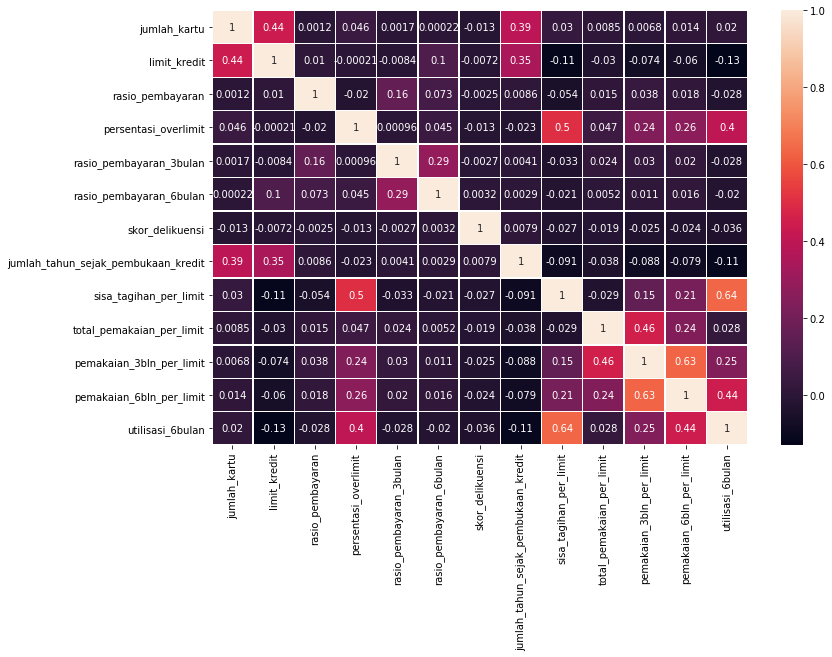

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_train[no_multicolinear.index].corr(), annot=True, linewidth=0.4)
plt.show()

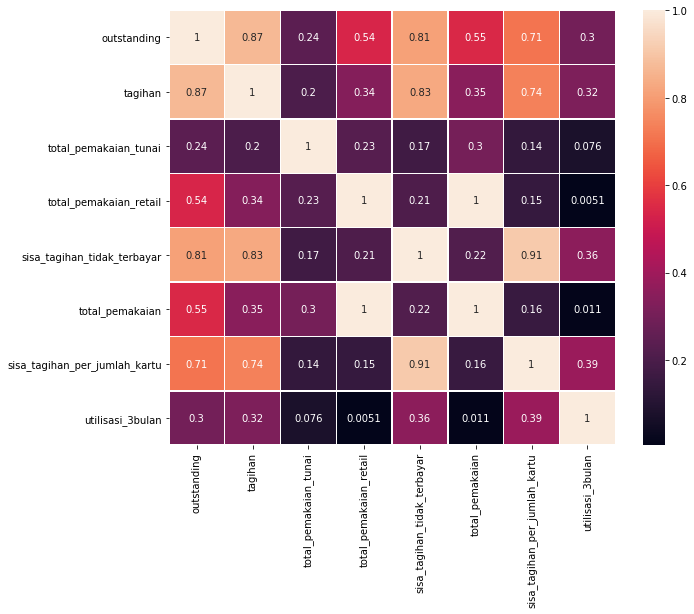

In [56]:
sns.heatmap(df_train[multicolinear.index[1:]].corr(), annot=True, linewidth=0.4)
plt.show()

In [117]:
def plot_distplot(column) :
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.distplot(df_train[column])
    plt.title('Distplot of {} in training data'.format(column))
    
    plt.subplot(1, 2, 2)
    sns.distplot(df_test[column])
    plt.title('Distplot of {} in test data'.format(column))
    
    plt.show()

C:\Users\Data Scientist\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


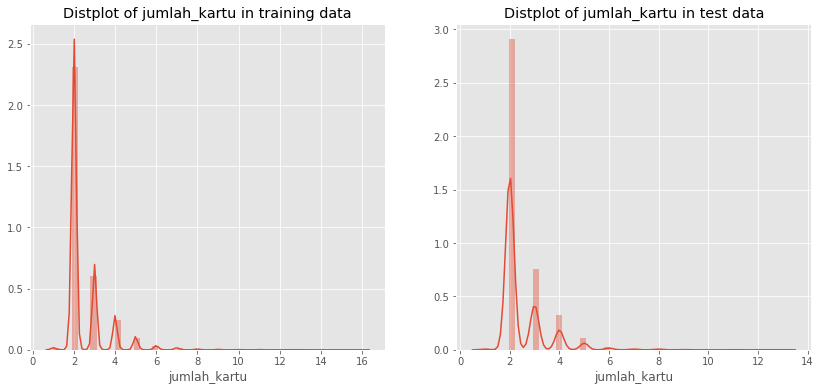

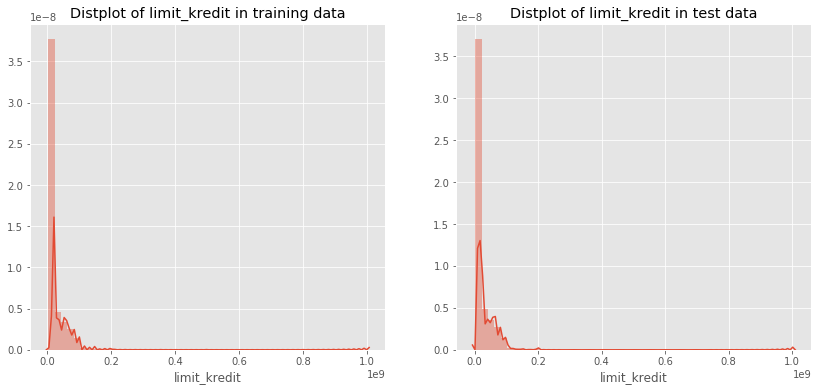

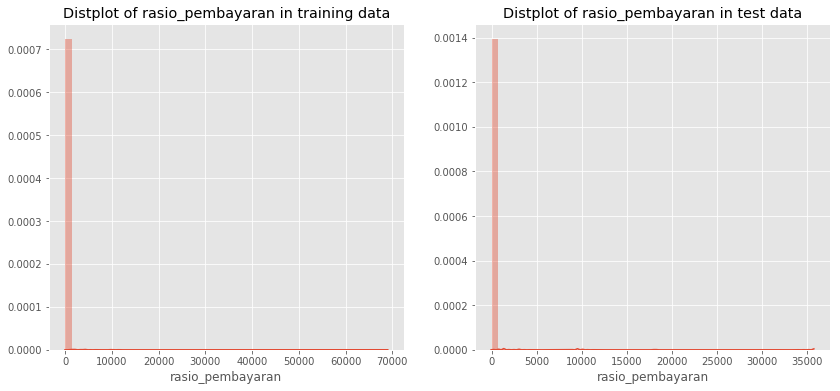

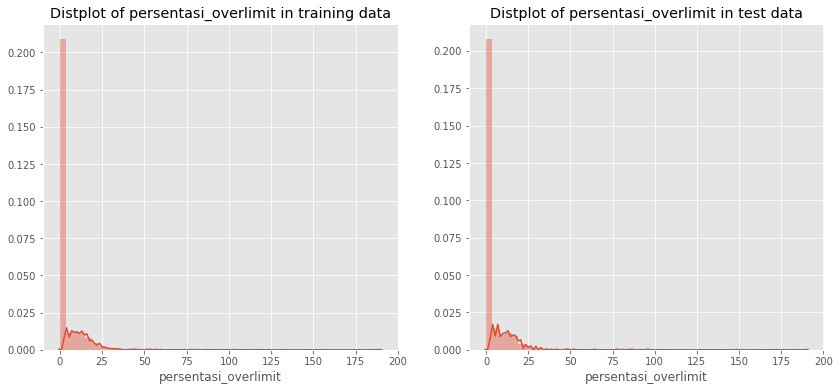

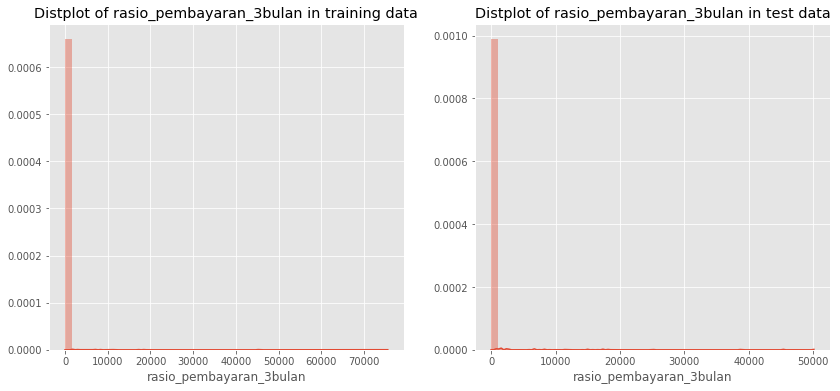

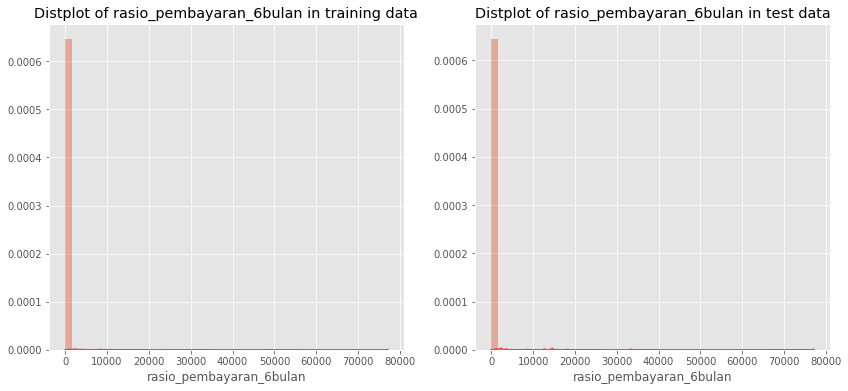

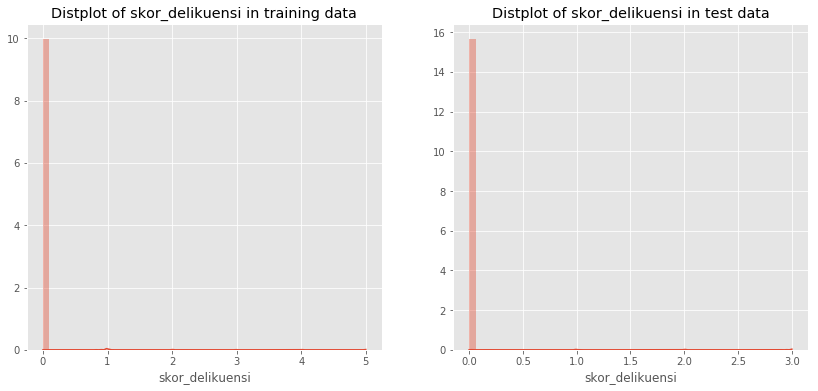

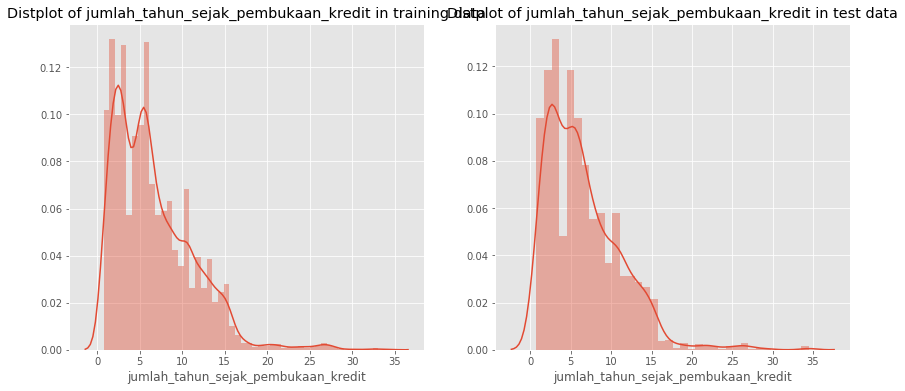

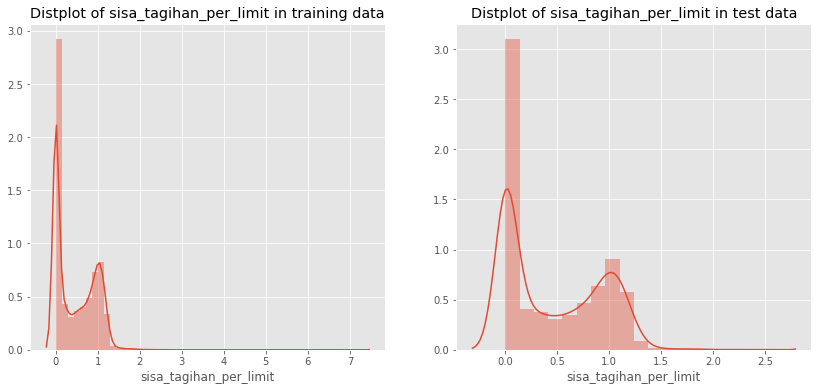

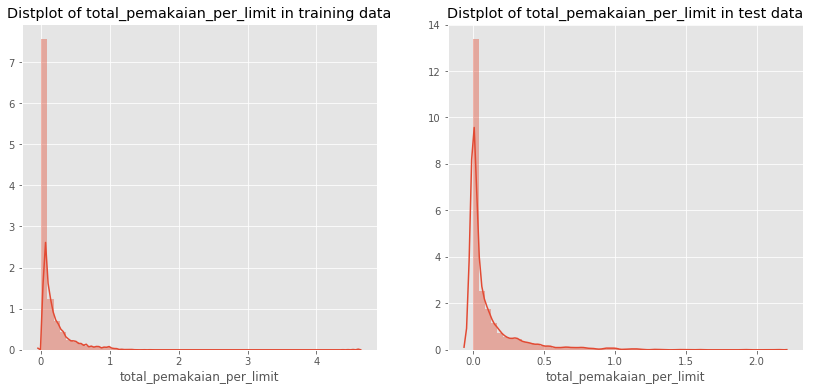

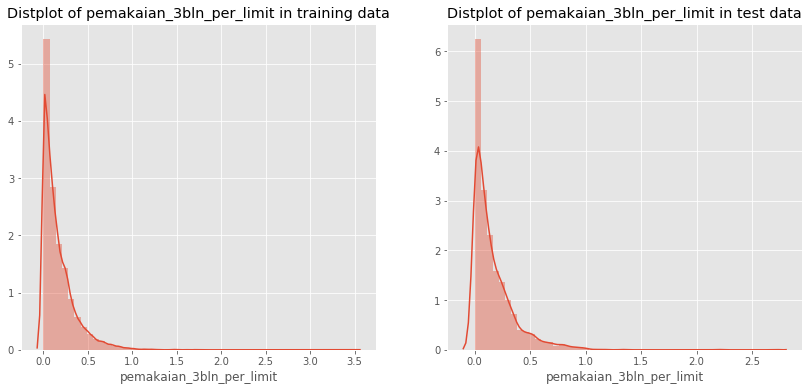

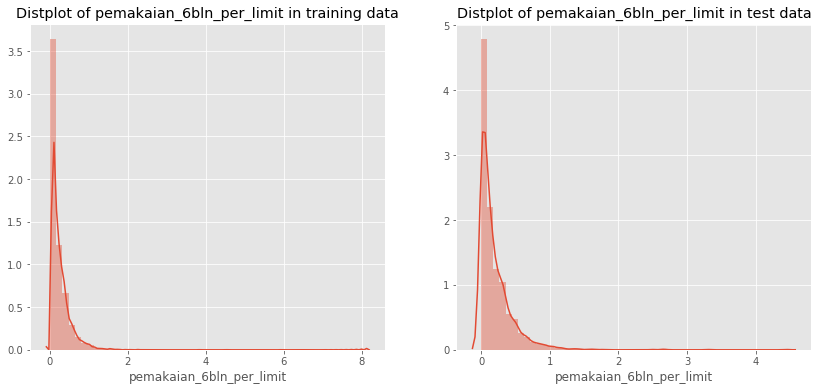

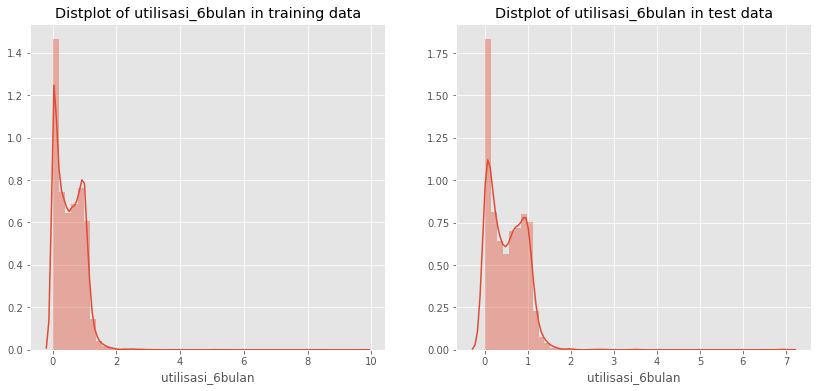

In [70]:
for col in no_multicolinear.index :
    plot_distplot(col)

In [118]:
y = df_train['flag_kredit_macet']
df_train = df_train[no_multicolinear.index]

In [122]:
df_train = pd.concat([df_train, y], axis=1)

In [123]:
df_train.nunique()

jumlah_kartu                             15
limit_kredit                            150
rasio_pembayaran                       1659
persentasi_overlimit                   1222
rasio_pembayaran_3bulan                2549
rasio_pembayaran_6bulan                2388
skor_delikuensi                           6
jumlah_tahun_sejak_pembukaan_kredit     448
sisa_tagihan_per_limit                 3235
total_pemakaian_per_limit              3600
pemakaian_3bln_per_limit               4006
pemakaian_6bln_per_limit               4038
utilisasi_6bulan                       4151
flag_kredit_macet                         2
dtype: int64

In [124]:
df_train.describe()

,jumlah_kartu,limit_kredit,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,sisa_tagihan_per_limit,total_pemakaian_per_limit,pemakaian_3bln_per_limit,pemakaian_6bln_per_limit,utilisasi_6bulan,flag_kredit_macet
count,15493.000000,1.549300e+04,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000,15493.000000
mean,2.506551,2.079833e+07,70.379358,3.343533,109.871661,119.636639,0.004776,6.634093,0.468246,0.109864,0.167489,0.202755,0.533719,0.087717
std,1.012655,2.955334e+07,793.681915,9.241921,1323.684441,1465.216266,0.114088,4.675454,0.473056,0.199883,0.192290,0.274185,0.432350,0.282892
min,1.000000,3.000000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,5.000000e+06,0.000000,0.000000,20.800000,22.300000,0.000000,2.920000,0.000000,0.000000,0.035200,0.033000,0.155000,0.000000
50%,2.000000,9.000000e+06,27.300000,0.000000,50.100000,66.100000,0.000000,5.666667,0.335000,0.022600,0.108000,0.117000,0.496000,0.000000
75%,3.000000,2.200000e+07,100.000000,1.060000,92.400000,100.000000,0.000000,9.330000,0.930000,0.128000,0.239000,0.285000,0.863000,0.000000
max,16.000000,1.000000e+09,68983.000000,190.000000,75575.000000,77056.000000,5.000000,34.416667,7.240000,4.600000,3.490000,8.110000,9.730000,1.000000


In [126]:
bin_var = set(df_train.columns) - set(['jumlah_kartu', 'skor_delikuensi'])

In [129]:
for var in df_train.columns :
    df_train['binning_{}'.format(var)] = pd.qcut(df_train[var], 10, duplicates='drop')

In [130]:
df_train.head()

,jumlah_kartu,limit_kredit,rasio_pembayaran,persentasi_overlimit,rasio_pembayaran_3bulan,rasio_pembayaran_6bulan,skor_delikuensi,jumlah_tahun_sejak_pembukaan_kredit,sisa_tagihan_per_limit,total_pemakaian_per_limit,...,binning_rasio_pembayaran_6bulan,binning_total_pemakaian_per_limit,binning_flag_kredit_macet,binning_persentasi_overlimit,binning_pemakaian_6bln_per_limit,binning_pemakaian_3bln_per_limit,binning_sisa_tagihan_per_limit,binning_rasio_pembayaran,binning_limit_kredit,binning_rasio_pembayaran_3bulan
0,2.0,7000000.0,102.19,0.0,74.78,100.00,0.0,15.416667,0.003760,0.000013,...,"(77.52, 100.0]","(-0.001, 0.004]","(-0.001, 1.0]","(-0.001, 4.29]","(1.45e-07, 0.019]","(0.0019, 0.0218]","(-0.001, 0.0926]","(100.0, 68983.0]","(5000000.0, 7000000.0]","(69.8, 78.4]"
1,2.0,10000000.0,0.00,0.0,0.00,0.00,0.0,0.750000,0.000000,0.000101,...,"(-0.001, 10.1]","(-0.001, 0.004]","(-0.001, 1.0]","(-0.001, 4.29]","(-0.001, 1.45e-07]","(-0.001, 0.0019]","(-0.001, 0.0926]","(-0.001, 14.1]","(9000000.0, 12000000.0]","(-0.001, 9.72]"
2,3.0,28000000.0,100.00,0.0,100.00,100.91,0.0,10.750000,0.000000,0.000000,...,"(100.0, 101.0]","(-0.001, 0.004]","(-0.001, 1.0]","(-0.001, 4.29]","(0.019, 0.0482]","(0.0218, 0.0479]","(-0.001, 0.0926]","(77.1, 100.0]","(20000000.0, 30000000.0]","(78.4, 100.0]"
3,4.0,21000000.0,100.00,0.0,25.01,22.64,0.0,19.750000,0.027683,0.120793,...,"(17.0, 31.38]","(0.0951, 0.174]","(-0.001, 1.0]","(-0.001, 4.29]","(1.45e-07, 0.019]","(0.0479, 0.075]","(-0.001, 0.0926]","(77.1, 100.0]","(20000000.0, 30000000.0]","(25.0, 36.5]"
4,2.0,10000000.0,95.99,0.0,97.49,99.84,0.0,1.666667,0.595186,0.266656,...,"(77.52, 100.0]","(0.174, 0.333]","(-0.001, 1.0]","(-0.001, 4.29]","(0.117, 0.167]","(0.274, 0.404]","(0.335, 0.622]","(77.1, 100.0]","(9000000.0, 12000000.0]","(78.4, 100.0]"


In [141]:
def create_pig_table(variable, target, data) :
    pig_table = data.groupby(variable)[target].agg({'Incidence':np.mean, 'Size': np.size})
    
    return pig_table

In [150]:
df_train.drop('binning_flag_kredit_macet', axis=1, inplace=True)

In [231]:
bin_col = list(df_train.columns[14:]) + ['jumlah_kartu', 'skor_delikuensi']

In [232]:
dict_pt = {}

for col in bin_col :
    dict_pt[col] = create_pig_table(col, 'flag_kredit_macet', df_train)

C:\Users\Data Scientist\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [161]:
dict_pt['binning_rasio_pembayaran']

,Incidence,Size
binning_rasio_pembayaran,,
"(-0.001, 14.1]",0.167419,6200.0
"(14.1, 27.3]",0.064558,1549.0
"(27.3, 77.1]",0.047036,1552.0
"(77.1, 100.0]",0.021558,4917.0
"(100.0, 68983.0]",0.032941,1275.0


In [233]:
def graph(pig_table, variable) :
    df = pig_table[variable]
    df['Incidence'].plot(secondary_y=True)
    df['Size'].plot(kind='bar', width=0.5, edgecolor='none', color='lightgreen')
    
    plt.xlim(-0.5, len(df)-0.5)
    plt.xticks(np.arange(len(df)), df.index)
    plt.show()

In [234]:
plt.style.use('seaborn-whitegrid')

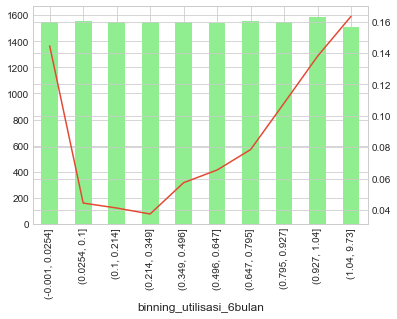

In [235]:
graph(dict_pt, 'binning_utilisasi_6bulan')

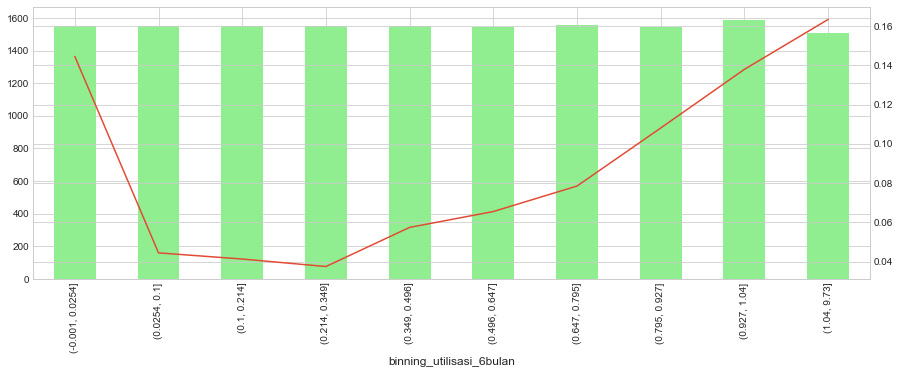

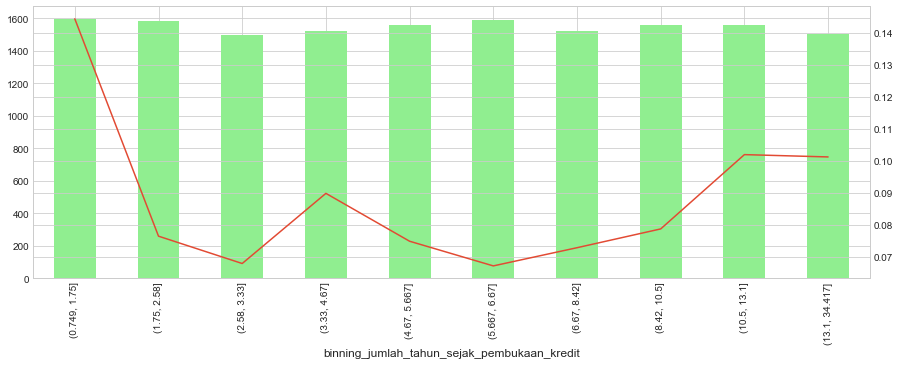

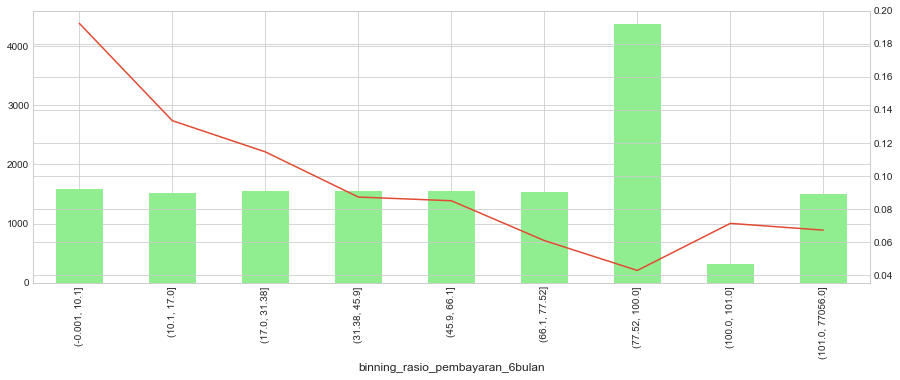

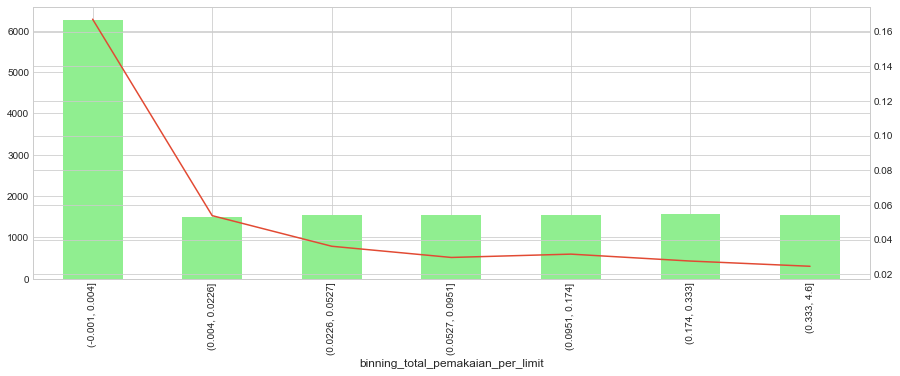

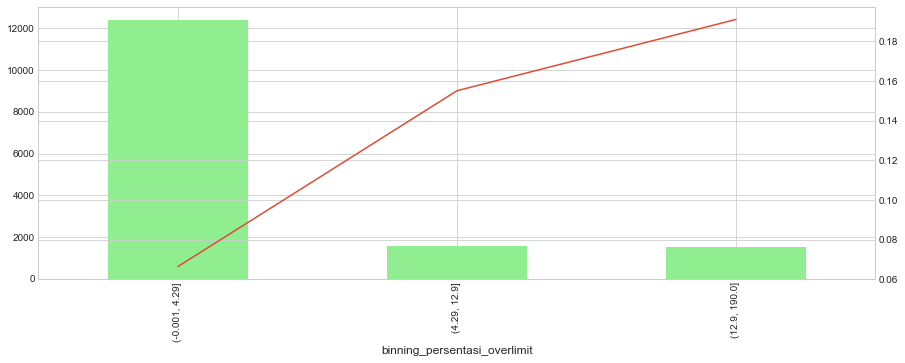

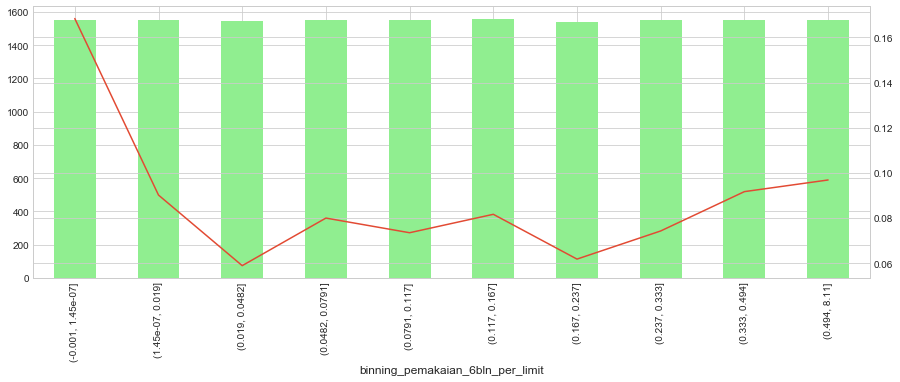

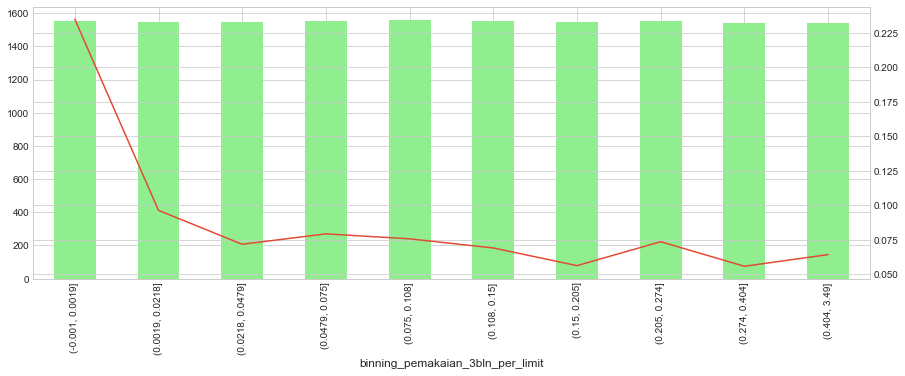

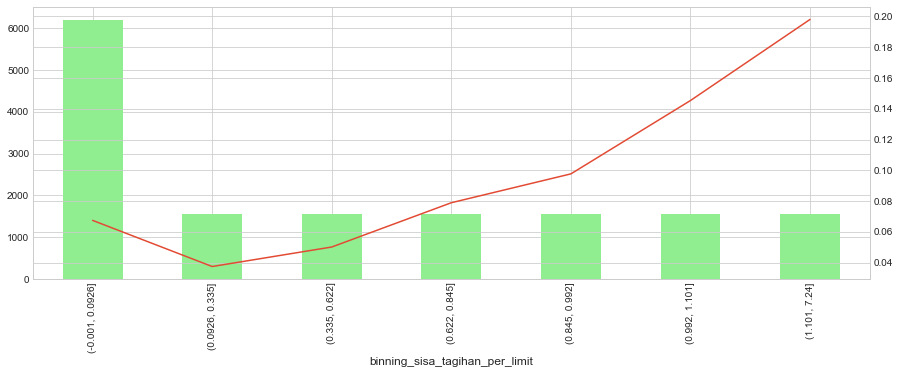

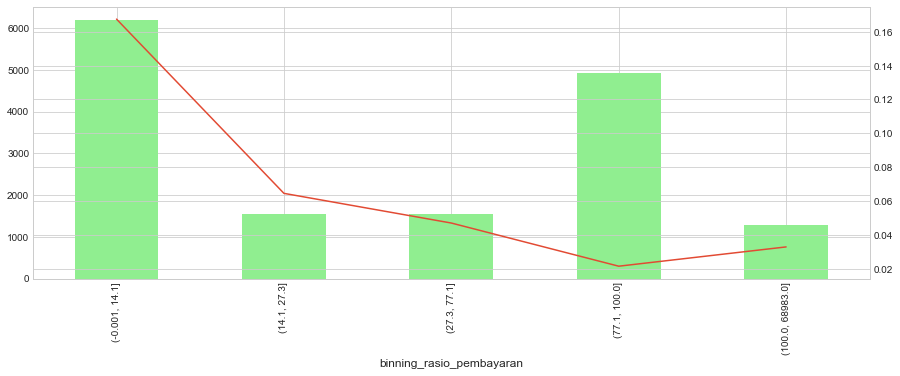

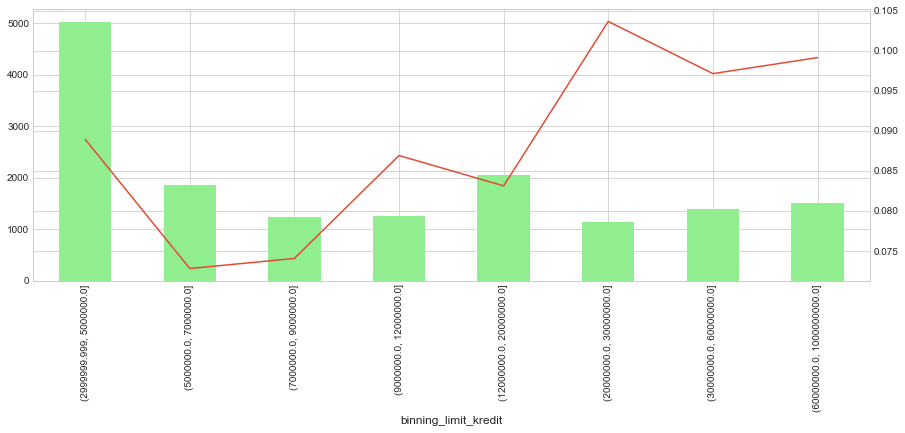

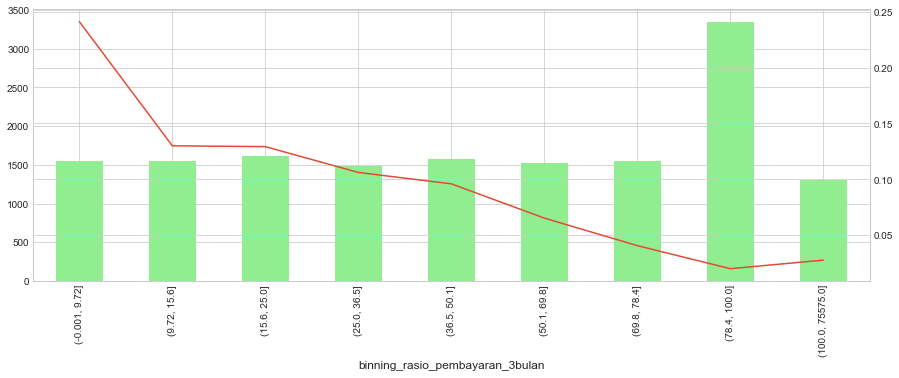

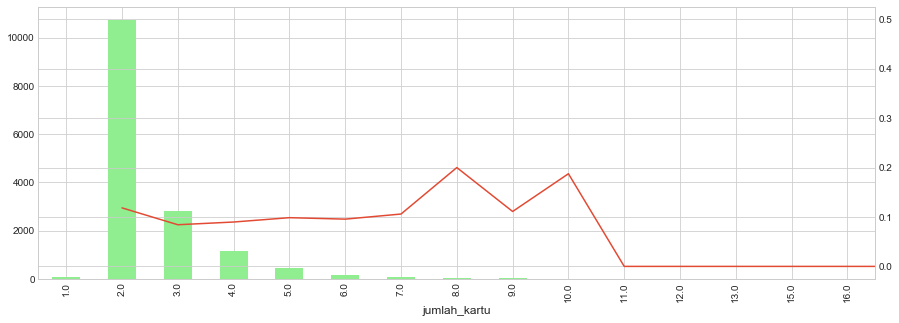

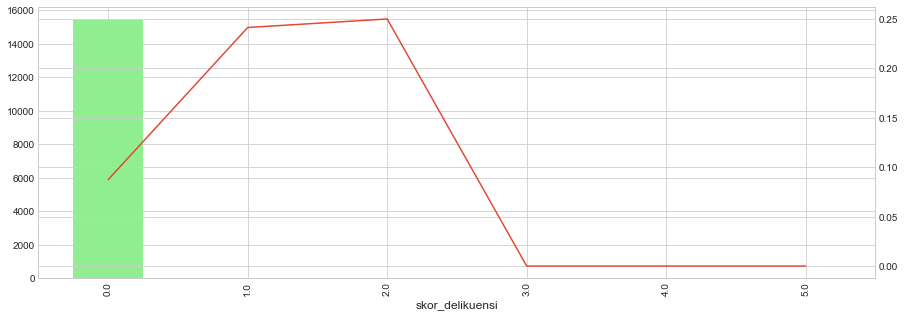

In [237]:
for var in bin_col :
    plt.figure(figsize=(15, 5))
    graph(dict_pt, var)

In [375]:
def woe(data, variable, target):
    
    df_woe = pd.crosstab(data[variable], data[target]).rename(columns={0.0:'Bad', 1.0:'Good'})
    
    bad_total = df_woe['Bad'].sum()
    good_total = df_woe['Good'].sum()
    
    df_woe['perc_bad'] = df_woe['Bad']/bad_total
    df_woe['perc_good'] = df_woe['Good']/good_total
    df_woe['woe_{}'.format(variable)] = np.log(df_woe['perc_good']/df_woe['perc_bad'])
    df_woe['IV'] = (df_woe['perc_good']-df_woe['perc_bad'])*df_woe['woe_{}'.format(variable)]
    
    IV_value = df_woe['IV'].sum()
    return df_woe, IV_value

In [376]:
woe_, IV = woe(df_train, 'binning_sisa_tagihan_per_limit', 'flag_kredit_macet')

In [377]:
dict_woe = {}
dict_IV = {}
for col in df_train.columns[14:] :
    woe_, IV = woe(df_train, col, 'flag_kredit_macet')
    dict_woe[col] = woe_
    dict_IV[col] = IV 

In [378]:
dict_woe['binning_persentasi_overlimit']

flag_kredit_macet,Bad,Good,perc_bad,perc_good,woe_binning_persentasi_overlimit,IV
binning_persentasi_overlimit,,,,,,
"(-0.001, 4.29]",11572,823,0.818735,0.605592,-0.301553,0.064274
"(4.29, 12.9]",1313,241,0.092897,0.177336,0.646561,0.054595
"(12.9, 190.0]",1249,295,0.088368,0.217071,0.898711,0.115667


In [257]:
dict_IV

{'binning_jumlah_tahun_sejak_pembukaan_kredit': 0.07058341630136195,
 'binning_limit_kredit': 0.013359799448666743,
 'binning_pemakaian_3bln_per_limit': 0.28108222488992013,
 'binning_pemakaian_6bln_per_limit': 0.11243586024402598,
 'binning_persentasi_overlimit': 0.23453602149262087,
 'binning_rasio_pembayaran': 0.7826792596246767,
 'binning_rasio_pembayaran_3bulan': 0.6983469976322313,
 'binning_rasio_pembayaran_6bulan': 0.29940850537173685,
 'binning_sisa_tagihan_per_limit': 0.28793589164528466,
 'binning_total_pemakaian_per_limit': 0.7326682486219909,
 'binning_utilisasi_6bulan': 0.31423059299269956}

In [249]:
pd.crosstab(df_train['skor_delikuensi'], df_train['flag_kredit_macet'])

flag_kredit_macet,0.0,1.0
skor_delikuensi,,
0.0,14100,1351
1.0,22,7
2.0,3,1
3.0,2,0
4.0,4,0
5.0,3,0


In [251]:
pd.crosstab(df_train['jumlah_kartu'], df_train['flag_kredit_macet'])

flag_kredit_macet,0.0,1.0
jumlah_kartu,,
1.0,67,9
2.0,9829,905
3.0,2544,251
4.0,1024,112
5.0,416,44
6.0,135,16
7.0,60,15
8.0,24,3
9.0,13,3


In [282]:
df_train.jumlah_kartu = df_train.jumlah_kartu.replace(np.arange(7, 17), ['>=7']*10)
df_train.skor_delikuensi = df_train.skor_delikuensi.replace(np.arange(1, 6), ['>=1']*5)

In [285]:
for col in ['skor_delikuensi', 'jumlah_kartu'] :
    woe_, IV = woe(df_train, col, 'flag_kredit_macet')
    dict_woe[col] = woe_
    dict_IV[col] = IV 

In [296]:
df_IV = pd.Series(dict_IV, index=dict_IV.keys()).sort_values()

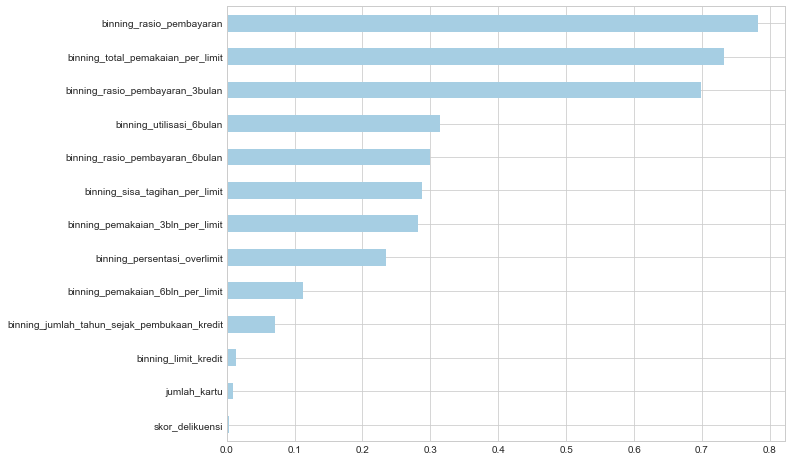

In [306]:
plt.figure(figsize=(10, 8))
df_IV.plot(kind='barh', colormap='Paired')
plt.show()

In [329]:
df_IV[df_IV>0.1].index

Index(['binning_pemakaian_6bln_per_limit', 'binning_persentasi_overlimit',
       'binning_pemakaian_3bln_per_limit', 'binning_sisa_tagihan_per_limit',
       'binning_rasio_pembayaran_6bulan', 'binning_utilisasi_6bulan',
       'binning_rasio_pembayaran_3bulan', 'binning_total_pemakaian_per_limit',
       'binning_rasio_pembayaran'],
      dtype='object')

In [330]:
variable = ['pemakaian_6bln_per_limit', 'persentasi_overlimit', 'pemakaian_3bln_per_limit', 'sisa_tagihan_per_limit', 'rasio_pembayaran_6bulan', 
           'utilisasi_6bulan', 'rasio_pembayaran_3bulan', 'total_pemakaian_per_limit', 'rasio_pembayaran']

In [331]:
X = df_train[variable]

In [307]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler

In [337]:


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

lr = LogisticRegression()

weights = np.linspace(0., 0.95, 20)

params_lr = {'C':np.arange(0.05, 0.99, 0.15), 'class_weight':[{0: x, 1: 1.0-x} for x in weights]}

grid_model = GridSearchCV(lr, params_lr, cv=7, scoring='roc_auc', n_jobs=-1)

grid_model.fit(x_train, y_train)

print(grid_model.best_params_)
print(grid_model.best_score_)

{'C': 0.2, 'class_weight': {0: 0.95, 1: 0.050000000000000044}}
0.7783769483936643


In [338]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

pred = grid_model.predict(x_test)

print(confusion_matrix(y_test, pred))
print(roc_auc_score(y_test, pred))

[[4240    0]
 [ 408    0]]
0.5


In [347]:
X = df_train[variable]

scaler =RobustScaler()
scaler.fit(X)

X = scaler.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

lr = LogisticRegression()

weights = np.linspace(0.05, 0.1, 10)

params_lr = {'C':np.arange(0.05, 1, 0.2), 'class_weight':[{0: x, 1: 1.0-x} for x in weights]}

grid_model = GridSearchCV(lr, params_lr, cv=7, scoring='roc_auc', n_jobs=-1)

grid_model.fit(x_train, y_train)

print(grid_model.best_params_)
print(grid_model.best_score_)

{'C': 0.8500000000000001, 'class_weight': {0: 0.1, 1: 0.9}}
0.7694423824074224


In [348]:
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

pred = grid_model.predict(x_test)

print(confusion_matrix(y_test, pred))
print(roc_auc_score(y_test, pred))

[[1894  933]
 [  60  212]]
0.7246899644187352


In [381]:
for var in df_IV[df_IV>0.1].index :
    df_train = df_train.join(dict_woe[var]['woe_{}'.format(var)], on=var)

In [383]:
df_train.columns

Index(['jumlah_kartu', 'limit_kredit', 'rasio_pembayaran',
       'persentasi_overlimit', 'rasio_pembayaran_3bulan',
       'rasio_pembayaran_6bulan', 'skor_delikuensi',
       'jumlah_tahun_sejak_pembukaan_kredit', 'sisa_tagihan_per_limit',
       'total_pemakaian_per_limit', 'pemakaian_3bln_per_limit',
       'pemakaian_6bln_per_limit', 'utilisasi_6bulan', 'flag_kredit_macet',
       'binning_utilisasi_6bulan',
       'binning_jumlah_tahun_sejak_pembukaan_kredit',
       'binning_rasio_pembayaran_6bulan', 'binning_total_pemakaian_per_limit',
       'binning_persentasi_overlimit', 'binning_pemakaian_6bln_per_limit',
       'binning_pemakaian_3bln_per_limit', 'binning_sisa_tagihan_per_limit',
       'binning_rasio_pembayaran', 'binning_limit_kredit',
       'binning_rasio_pembayaran_3bulan',
       'woe_binning_pemakaian_6bln_per_limit',
       'woe_binning_persentasi_overlimit',
       'woe_binning_pemakaian_3bln_per_limit',
       'woe_binning_sisa_tagihan_per_limit',
       'woe_bin

In [416]:
X2 = df_train.iloc[:,-9:]

x_train, x_test, y_train, y_test = train_test_split(X2, y, test_size=0.25, stratify=y, random_state=42)

lr = LogisticRegression(penalty='l1')

weights = np.linspace(0.05, 0.15, 10)

params_lr = {'C':[0.05], 'class_weight':[{0: 0.08, 1: 0.92}]}

grid_model2 = GridSearchCV(lr, params_lr, cv=7, scoring='roc_auc', n_jobs=-1)

grid_model2.fit(x_train, y_train)

print(grid_model2.best_params_)
print(grid_model2.best_score_)

{'C': 0.05, 'class_weight': {0: 0.08, 1: 0.92}}
0.8162879293582803


In [418]:
pred = grid_model2.predict(x_test)

print(confusion_matrix(y_test, pred))
print(roc_auc_score(y_test, pred))

[[2470 1064]
 [  68  272]]
0.749462365591398


In [415]:
lr?